Beata Sirowy
# __Testing your code: the pytest library__
Based on Matthes, E. (2023) _Python: Crash Course_


Pytest is a third party package. Before we install it We’ll update pip - the tool used to install third-party packages. As a next step we install pytest

In [ ]:
$ python -m pip install --upgrade pip

$ python -m pip install --user pytest

You can use this command to update any third-party package installed
on your system:

In [ ]:
$ python -m pip install --upgrade package_name

With Amaconda distribution we use Anaconda prompt  

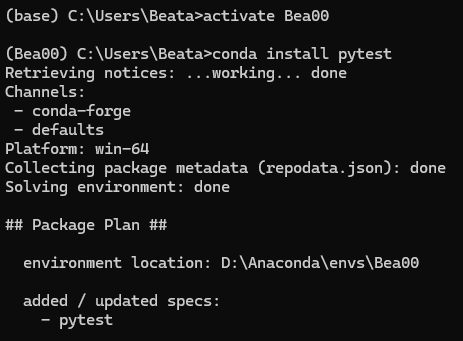

## Testing a function

We save the following function as __name_function.py__

In [ ]:
def get_formatted_name(first, last): #Generate a neatly formatted full name.
    full_name = f"{first} {last}"
    return full_name.title()


We save the following program as __names.py__

In [ ]:
from name_function import get_formatted_name


print("Enter 'q' at any time to quit.")
while True:
    first = input("\nPlease give me a first name: ")
    if first == 'q':
        break
    last = input("Please give me a last name: ")
    if last == 'q':
        break
    formatted_name = get_formatted_name(first, last)
    print(f"\tNeatly formatted name: {formatted_name}.")

   
    
    

Enter 'q' at any time to quit.
	Neatly formatted name: Janiis Joplin.
	Neatly formatted name: Jim Morrison.


Let's say But say we want to modify get_formatted_name() so it can also handle middle names. As we
do so, we want to make sure we don’t break the way the function handles names that have only a first and last name.

We could test our code by running names.py and entering a name like Janis Joplin every time we modify
get_formatted_name(), but that would become tedious. 

Fortunately, pytest provides an efficient way to automate the testing of a function’s output.

There is a wide variety of approaches to testing software. 
One of the simplest kinds of test is a unit test.

### Unit Tests and Test Cases
- __A unit test__ verifies that one specific aspect of a function’s behavior is correct. 
- __A test case__ is a collection of unit tests that together prove that a function behaves as it’s supposed to, within the full range of situations you expect it to handle.

- A good test case considers all the possible kinds of input a function
could receive and includes tests to represent each of these situations. 

- __A test case with full coverage__ includes a full range of unit tests covering all the pos-
sible ways you can use a function. 

- Achieving full coverage on a large project can be a challenge. It’s often good enough to write tests for your code’s critical behaviors and then aim for full coverage only if the project starts to see widespread use.

### A passing test

Our pytest test function will call the function we’re
testing, and we’ll make an assertion about the value that’s returned. If our
assertion is correct, the test will pass; if the assertion is incorrect, the test
will fail.

We save the following as __test_name_function.py__

In [ ]:

from name_function import get_formatted_name

def test_first_last_name(): # Do names like 'Janis Joplin' work?
    formatted_name = get_formatted_name('janis', 'joplin')
    assert formatted_name == 'Janis Joplin'
# An assertion is a claim about a condition.
# Here we’re claiming that the value of formatted_name should be 'Janis Joplin'.

- The name of a test file is important; it must start with test_. When we ask pytest
to run the tests we’ve written, it will look for any file that begins with test_,
and run all of the tests it finds in that file.

- In the test file, we first import the function that we want to test: get
_formatted_name(). 
- Then we define a test function: in this case, test_first
_last_name() . 
- Test functions need to start with the word test,
followed by an underscore. Any function that starts with test_ will be
discovered by pytest, and will be run as part of the testing process.
- Also, test names should be longer and more descriptive than a typical
function name. 
- You’ll never call the function yourself; pytest will find the
function and run it for you.

__Most commonly used assertion statements in tests:__

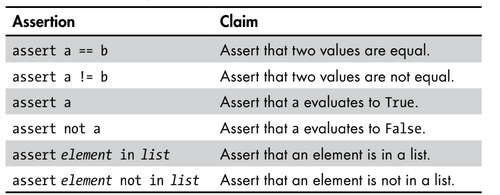

### Running a test


- navigate to the folder that contains the test file.
- in the terminal window, enter the command pytest.

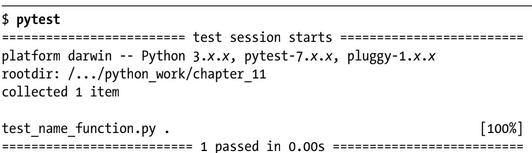

- We can see that pytest found one test to run and we can see the test file that’s being run. 
- The single dot after the name of the file tells us that a single test passed, and the 100% makes it clear that all of the tests have been run. 
- A large project can have hundreds or thousands of tests, and the dots and percentage-complete indicator can be helpful in monitoring the overall progress of the test run.

### Failing a test

Let’s modify get_formatted_name() so it can handle middle names, but let’s do so in a way that breaks the function for names with just a first and last name,

In [ ]:
def get_formatted_name(first, middle, last):
    full_name = f"{first} {middle} {last}"
    return full_name.title()

This version should work for people with middle names, but when we
test it, we see that we’ve broken the function for people with just a first and
last name. This time, running pytest gives the following output:

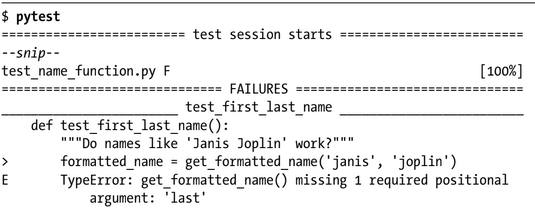
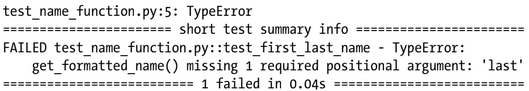

- The most important information is repeated in a shorter summary at
the end, so when you’re running many tests, you can get a quick sense of
which tests failed and why.

### Responding to a Failed Test

- Examine the changes you just made to the function, and figure out how those changes broke the desired
behavior.
- In this case, get_formatted_name() used to require only two parameters: a
first name and a last name. Now it requires a first name, middle name, and
last name. 
- The addition of that mandatory middle name parameter broke
the original behavior of get_formatted_name(). The best option here is to make the middle name optional.

In [ ]:
def get_formatted_name(first, last, middle=''):
    if middle:
        full_name = f"{first} {middle} {last}"
    else:
        full_name = f"{first} {last}"
        return full_name.title()

Let’s run the test again:

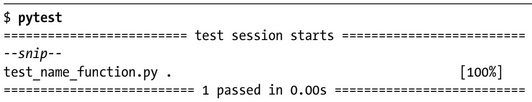

### Adding a new test

Let’s write a second test for people who include a middle name. We do this by
adding another test function to the file test_name_function.py:

In [ ]:
def test_first_last_middle_name():
    formatted_name = get_formatted_name('wolfgang', 'mozart', 'amadeus')
    assert formatted_name == 'Wolfgang Amadeus Mozart'

We name the function to make it clear which behavior of get_formatted
_name() we’re testing. As a result, if the test fails, we’ll know right away what
kinds of names are affected.

To test the function, we call get_formatted_name() with a first, last, and
middle name, and then we make an assertion that the returned full
name matches the full name (first, middle, and last) that we expect.

When
we run pytest again, both tests pass:

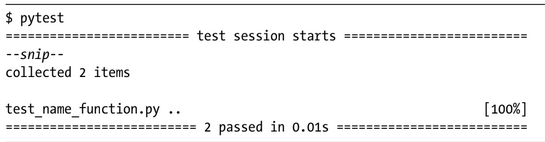

The two dots 1 indicate that two tests passed, which is also clear from
the last line of output.

## Testing a class

- Testing a class is similar to testing a function, because much of the work
involves testing the behavior of the methods in the class. However, there
are a few differences, so let’s write a class to test. 

Consider a class that helps administer anonymous surveys

survey.py

In [18]:
class AnonymousSurvey:
    def __init__(self, question):
        self.question = question
        self.responses = []
        
    def show_question(self):
        print(self.question)
        
    def store_response(self, new_response):
        self.responses.append(new_response)
        
    def show_results(self):
        print("Survey results:")
        for response in self.responses:
            print(f"- {response}")

- To create an instance from this class, all you have to provide is a question.
- Once you have an instance representing a particular survey, you display the survey question with show_question(), store a response using store_response(), and show results with show_results().

To show that the AnonymousSurvey class works, let’s write a program  that
uses the class

language
_survey.py

In [19]:
from survey import AnonymousSurvey

question = "What language did you first learn to speak?"
language_survey = AnonymousSurvey(question)

# Show the question, and store responses to the question.
language_survey.show_question()
print("Enter 'q' at any time to quit.\n")
while True:
    response = input("Language: ")
    if response == 'q':
        break
    language_survey.store_response(response)

# Show the survey results.
print("\nThank you to everyone who participated in the survey!")
language_survey.show_results()

What language did you first learn to speak?
Enter 'q' at any time to quit.


Thank you to everyone who participated in the survey!
Survey results:
- English
- French
- Spanish


To ensure we don’t break existing behavior as we develop this module with new options, we can write tests for the class.

### Testing the AnonymousSurvey Class

Let’s write a test that verifies one aspect of the way AnonymousSurvey behaves

test_survey.py

- The
first test function will verify that when we store a response to the survey
question, the response will end up in the survey’s list of responses.

In [ ]:
from survey import AnonymousSurvey

#Test that a single response is stored properly.

def test_store_single_response():
    question = "What language did you first learn to speak?"
    language_survey = AnonymousSurvey(question)
    language_survey.store_response('English')
    assert 'English' in language_survey.responses

- To test the behavior of a class, we need to make an instance of the
class. 
- We create an instance called language_survey  with the question
"What language did you first learn to speak?" 
- We store a single response,
English, using the store_response() method. 
- Then we verify that the response
was stored correctly by asserting that English is in the list language_survey
.responses .

By default, running the command pytest with no arguments will run all
the tests that pytest discovers in the current directory. To focus on the tests
in one file, pass the name of the test file you want to run. Here we’ll run
just the one test we wrote for AnonymousSurvey:

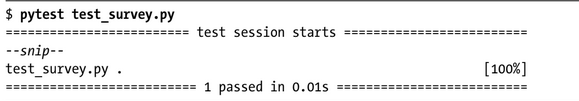

Let’s verify that three responses can be stored correctly. To
do this, we add another method to TestAnonymousSurvey:

In [ ]:
# Test that three individual responses are stored properly.

def test_store_three_responses():
    question = "What language did you first learn to speak?"
    language_survey = AnonymousSurvey(question)
    responses = ['English', 'Spanish', 'Mandarin']
    
    for response in responses:
        language_survey.store_response(response)
    
    for response in responses:
            assert response in language_survey.responses

We define a list containing three different responses, and then we call store_response()
for each of these responses. 
Once the responses have been stored, we write another loop and assert that each response is now in language_survey.responses

When we run the test file again, both tests (for a single response and
for three responses) pass:

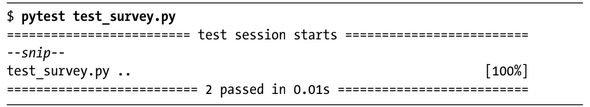

### Using fixtures

- In test_survey.py, we created a new instance of AnonymousSurvey in each test function. This is fine in the short example we’re working with, but in a real-
world project with tens or hundreds of tests, this would be problematic.

- In testing, a fixture helps set up a test environment. Often, this means
creating a resource that’s used by more than one test. 

- We create a fixture in
pytest by writing a function with the decorator @pytest.fixture. 

- A decorator is a directive placed just before a function definition; Python applies this direc-
tive to the function before it runs, to alter how the function code behaves.

- You can start to use decorators from
third-party packages before learning to write them yourself.


Let’s use a fixture to create a single survey instance that can be used in
both test functions in test_survey.py:

In [ ]:
import pytest
from survey import AnonymousSurvey

# A survey that will be available to all test functions
@pytest.fixture
def language_survey():
    question = "What language did you first learn to speak?"
    language_survey = AnonymousSurvey(question)
    return language_survey

# Test that a single response is stored properly.
def test_store_single_response(language_survey):
    language_survey.store_response('English')
    assert 'English' in language_survey.responses

# Test that three individual responses are stored properly.
def test_store_three_responses(language_survey):
    responses = ['English', 'Spanish', 'Mandarin']
    for response in responses:
        language_survey.store_response(response)
    for response in responses:
        assert response in language_survey.responses


- We apply the @pytest.fixture decorator to the new func-
tion language_survey() This function builds an AnonymousSurvey object and
returns the new survey.

- The definitions of both test functions have changed;
each test function now has a parameter called language_survey. 

- When
a parameter in a test function matches the name of a function with the
@pytest.fixture decorator, the fixture will be run automatically and
the return value will be passed to the test function. 

- In this example, the function language_survey() supplies both test_store_single_response() and
test_store_three_responses() with a language_survey instance.

- There’s no new code in either of the test functions, but  two
lines have been removed from each function: the line that defined a
question and the line that created an AnonymousSurvey object.

- When we run the test file again, both tests still pass. 

- These tests would
be particularly useful when trying to expand AnonymousSurvey to handle
multiple responses for each person. After modifying the code to accept
multiple responses, you could run these tests and make sure you haven’t
affected the ability to store a single response or a series of individual
responses.

When you want to write a fixture, write a function that generates the
resource that’s used by multiple test functions. Add the @pytest.fixture
decorator to the new function, and add the name of this function as a
parameter for each test function that uses this resource.